# State of the Union

## Topic Modeling with *topicmodels*

### Created by Lars Bernhardsson

I used the jupyter/datascience-notebook docker image found at https://hub.docker.com/r/jupyter/datascience-notebook when making this notebook.

## R session prep

In [1]:
library(tidyverse)
library(tm)
library(topicmodels)

options(repr.plot.width = 16, repr.plot.height = 9, repr.matrix.max.rows = 10000, repr.matrix.max.cols = 10000)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




## Data

In [2]:
if(file.exists("SOTUtexts.RData")) {
    load("SOTUtexts.RData")
} else {
    stop("Run the data notebook first")
}

## Processing

In [3]:
s <- SimpleCorpus(VectorSource(d$Text))

m <- DocumentTermMatrix(
    s,
    control=list(
        removePunctuation=TRUE,
        removeNumbers=TRUE,
        stopwords=TRUE,
        stemming=TRUE,
        minWOrdLength=3
    )
)

In [4]:
lda_model <- LDA(x = m, k = 4)

In [5]:
terms(lda_model, 10)

Topic 1,Topic 2,Topic 3,Topic 4
will,american,will,american
year,will,america,will
must,year,american,america
peopl,america,year,year
american,job,must,thank
work,can,nation,countri
can,work,peopl,new
new,peopl,can,one
america,make,world,nation
now,that,govern,peopl


## Visualization

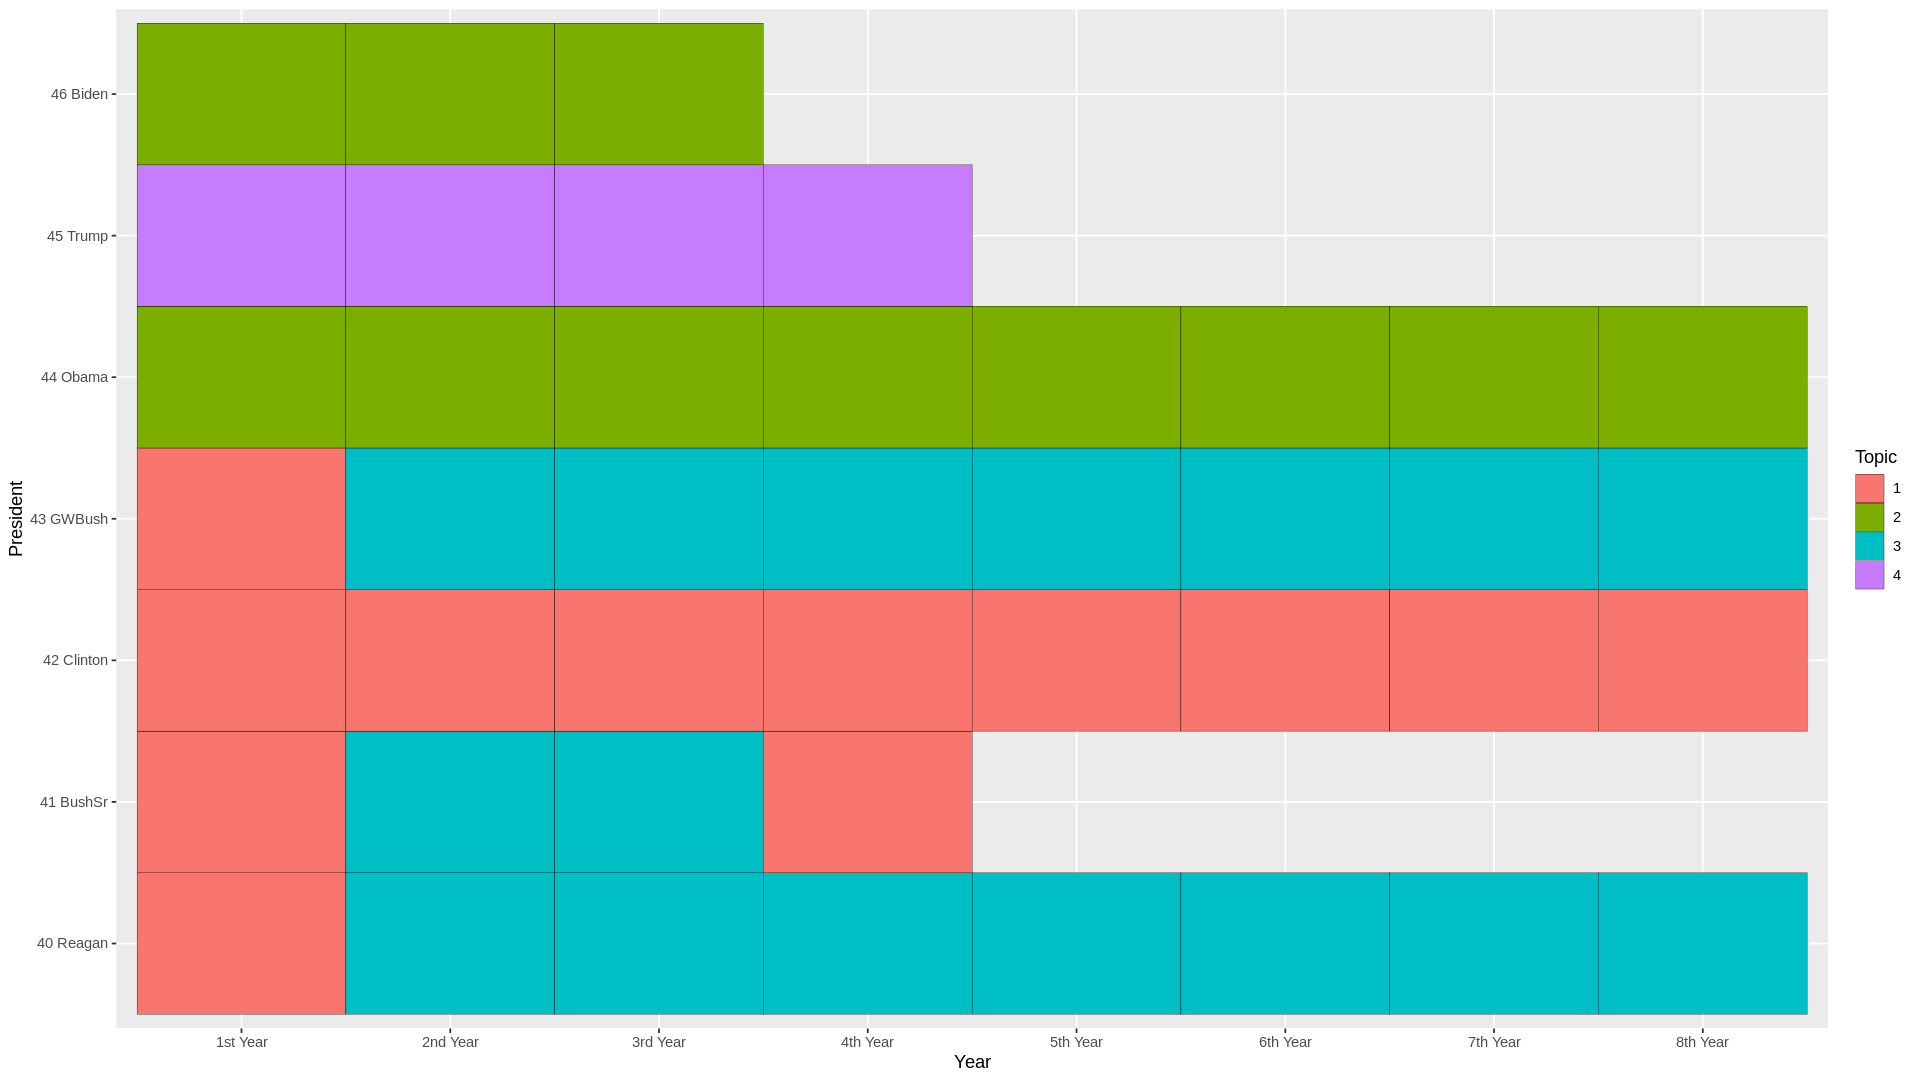

In [6]:
data.frame(President=d$President, Year=d$Year, Topic=factor(topics(lda_model))) %>%
    ggplot(aes(x=Year, y=President, fill=Topic)) +
    geom_tile(color="black")